In [1]:
import random

import heavy_tails as hevytail
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import real_data_loader
import torch
import train_garch

## Set seeds for reconstruction of the results

In [2]:
# Set seeds.
SEED = 12345
np.random.seed(SEED)
random.seed(SEED)
torch.manual_seed(SEED)

#### Load Data

Filter out selected times and stocks

In [3]:
real_loader = real_data_loader.RealDataLoader(cache="../data/cache")
real_data = real_loader.get_timeseries(
    col_name="Adj Close", data_path="../data/raw_yahoo_data", update_all=False
)

Cached data found at ../data/cache/time_series_Adj_Close.csv.


Inspect data for missing information

In [4]:
N_STOCKS = 9216
nan_mask = ~np.isnan(real_data)  # returns pd.dataframe
num_non_nans: pd.DataFrame = np.sum(nan_mask, axis=0)
non_nan_orderd_stocks: pd.DataFrame = num_non_nans.sort_values(ascending=False)
# plt.plot(non_nan_orderd_stocks.values)
stocks = non_nan_orderd_stocks.iloc[non_nan_orderd_stocks.values >= N_STOCKS].index

In [5]:
# stocks = ["MSFT", "AAPL", "IBM", "ADBE", "ORCL", "INTC", "AMD", "HPQ"]
# stocks = ['MSFT']
first_date = real_data.index[-N_STOCKS]
real_data = real_data.loc[first_date:, stocks]
real_data = real_data.loc[:, np.all(~np.isnan(real_data), axis=0)]
assert np.all(~np.isnan(real_data))
print(f"Shape: {real_data.shape}")
print(f"Frist Date {real_data.index[0]:%Y-%m-%d}")
print(f"Last Date {real_data.index[-1]:%Y-%m-%d}")

Shape: (9216, 233)
Frist Date 1987-08-05
Last Date 2024-03-01


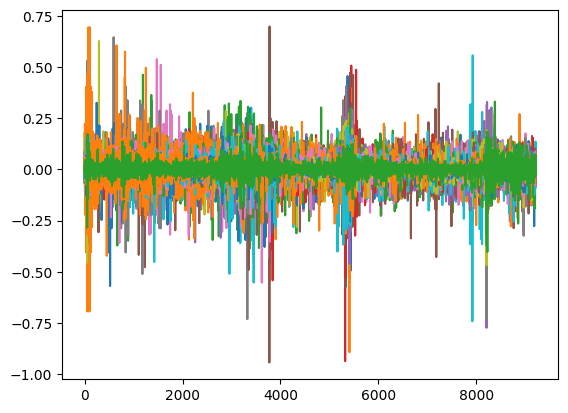

In [6]:
np_data = np.array(real_data)
np_ret = np.log(np_data[1:] / np_data[:-1])
np_ret[np.abs(np_ret) >= 2] = 0  # clean data
np_log_price = np.cumsum(np_ret, axis=0)
plt.plot(np_ret)
plt.show()

## Real Data

In [7]:
p = np_ret[np_ret > 0]
pp = np.sum(p / np.std(p) > 2) / p.size
print(f"pp {pp}")
n = -np_ret[np_ret < 0]
nn = np.sum(n / np.std(n) > 2) / n.size
print(f"nn {nn}")

pp 0.09123392680514342
nn 0.08149785728176569


Real data heavy tails pos_corr 0.9653207185971667
Real data heavy tails neg_corr 0.9653535988263716
Real data heavy tails pos_beta -3.592265544795492
Real data heavy tails neg_beta -3.2978252723117643
Real data heavy tails pos_beta_std 0.4173476388528757
Real data heavy tails neg_beta_std 0.3157198701875696
Real data heavy tails pos_beta_max -1.788608450055584
Real data heavy tails pos_beta_min -4.398758135867928
Real data heavy tails neg_beta_max -2.261203717318225
Real data heavy tails neg_beta_min -4.3268890737840495


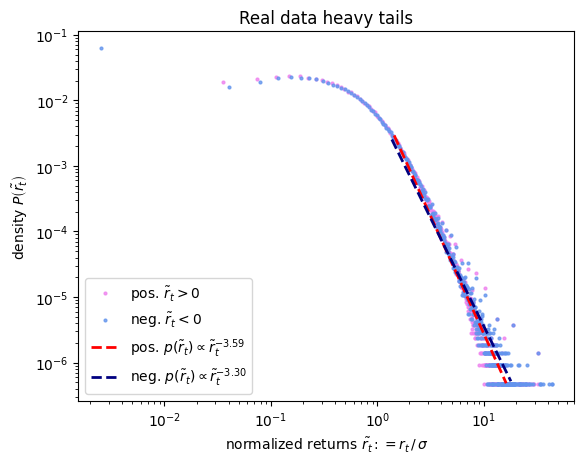

In [8]:
stats = [
    "pos_corr",
    "neg_corr",
    "pos_beta",
    "neg_beta",
    "pos_beta_std",
    "neg_beta_std",
    "pos_beta_max",
    "pos_beta_min",
    "neg_beta_max",
    "neg_beta_min",
]
hevytail.visualize_stat(plt.gca(), np_ret, "Real data", stats)
# plt.savefig("/home/nico/edu/masterthesis/presentations/week16/figures/ht.png")
plt.show()

## Garch Normal, p=3, q=3

In [9]:
cache = "../data/cache/Garch_normal_3_3_2024_06_26-11_11_24"
garch_log_returns = train_garch.sample_garch(cache, seed=0)

# Drop bad fits
garch_log_returns = garch_log_returns[
    :, np.sum(np.isnan(garch_log_returns), axis=0) == 0
]

/home/nico/edu/masterthesis/code/src/garch/train_garch.py:131: RuntimeWarning: invalid value encountered in log
  log_returns.append(np.log(return_simulation))


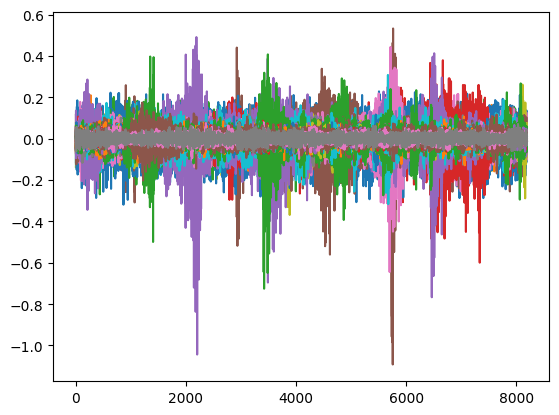

In [10]:
plt.plot(garch_log_returns)
plt.show()
plt.close()

GARCH Normal 3 3 heavy tails pos_corr 0.978890170164416
GARCH Normal 3 3 heavy tails neg_corr 0.9537297796950673
GARCH Normal 3 3 heavy tails pos_beta -3.8760322268424137
GARCH Normal 3 3 heavy tails neg_beta -3.2025427014400254
GARCH Normal 3 3 heavy tails pos_beta_std 0.6553094571652318
GARCH Normal 3 3 heavy tails neg_beta_std 0.6882157030526158
GARCH Normal 3 3 heavy tails pos_beta_max -2.350893836553996
GARCH Normal 3 3 heavy tails pos_beta_min -6.137530984336509
GARCH Normal 3 3 heavy tails neg_beta_max -2.221236790053938
GARCH Normal 3 3 heavy tails neg_beta_min -6.24857937850966


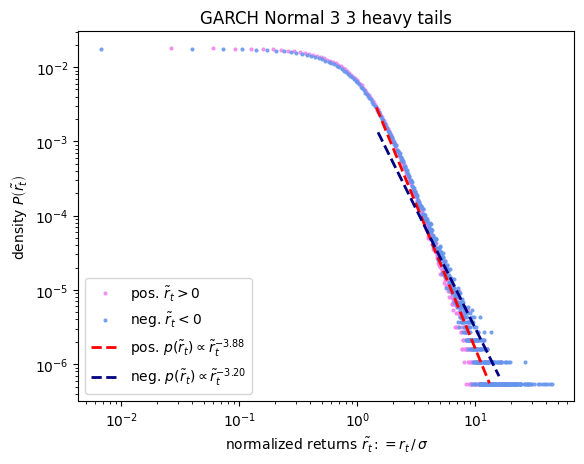

In [11]:
stats = [
    "pos_corr",
    "neg_corr",
    "pos_beta",
    "neg_beta",
    "pos_beta_std",
    "neg_beta_std",
    "pos_beta_max",
    "pos_beta_min",
    "neg_beta_max",
    "neg_beta_min",
]
hevytail.visualize_stat(plt.gca(), garch_log_returns, "GARCH Normal 3 3", stats)
# plt.savefig("/home/nico/edu/masterthesis/presentations/week16/figures/ht.png")
plt.show()